# Exploratory Data Analysis

Before modelling, do exploratory data analysis.

Exploratory data analysis includes descriptive statistics, data visualization and target based working on data. 

## Important Python libraries for EDA

**matplotlib** - A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.

**pandas** - An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

**seaborn** - A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**ggplot** - A system for declaratively creating graphics.

**bokeh** - An interactive visualization library for modern web browsers.

**plot.ly** - An interactive, open-source, and browser-based graphing library to make interactive, publication-quality graphs.

## First Look at Data

In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**To avoid any change in the original, copy the data**

In [2]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**Structural information about the data:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


**int:** discrete numerical variable 

**float:** continuous numerical variable

**object:** it will be faster if we convert it into categorical

In [4]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [5]:
import pandas as pd 
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [6]:
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [7]:
df.tail(3)

,method,number,orbital_period,mass,distance,year
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


**numbers of rows and colums:**

In [8]:
df.shape

(1035, 6)

**to get only variables:**

In [9]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

**basic summary statistics about the data:**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


**for including categorical variables:**

In [11]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


**unique values for all variables:**

In [12]:
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

**checking for missing values:**

In [13]:
df.isnull().values.any()

True

In [14]:
df.isnull()

,method,number,orbital_period,mass,distance,year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False


**variables of missing values:**

In [15]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

**filling missing values with "0":**

In [16]:
df['orbital_period'].fillna(0, inplace=True)

In [17]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

**filling missing values with average value:**

In [18]:
import numpy as np
df['mass'].fillna(np.mean(df.mass), inplace=True)

In [19]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

## Categorical Variable Summaries

In [20]:
kat_df = df.select_dtypes(include = ['category'])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


**classes of categorical variable:**

In [21]:
kat_df.method.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

**count of classes:**

In [22]:
kat_df['method'].value_counts().count()

10

**class frequency:**

In [23]:
kat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

**visual class frequency:**

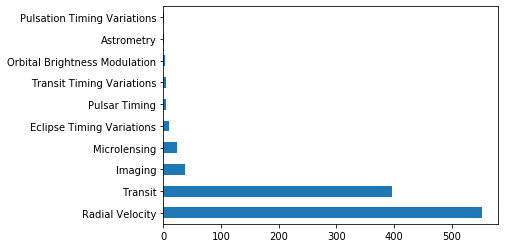

In [24]:
kat_df['method'].value_counts().plot.barh();

**change scale type of categorical variables:**

In [25]:
from pandas.api.types import CategoricalDtype

In [26]:
kat_df = kat_df.astype(CategoricalDtype(ordered = True))

In [27]:
kat_df.method.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: category
Categories (10, object): [Astrometry < Eclipse Timing Variations < Imaging < Microlensing ... Pulsation Timing Variations < Radial Velocity < Transit < Transit Timing Variations]

nominal is converted into ordinal.

## Continuous Variable Summaries

In [28]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**subset containing only continuous variables:**

In [29]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [30]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


**summary statistics:**

In [31]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.0000,1.000000,1.000000,2.000000,7.0
orbital_period,1035.0,1919.704595,25471.198309,0.0000,4.461268,31.884000,487.100000,730000.0
mass,1035.0,2.638161,2.687081,0.0036,1.285000,2.638161,2.638161,25.0
distance,808.0,264.069282,733.116493,1.3500,32.560000,55.250000,178.500000,8500.0
year,1035.0,2009.070531,3.972567,1989.0000,2007.000000,2010.000000,2012.000000,2014.0


**statistics for only one variable:**

In [32]:
df_num['mass'].describe()

count    1035.000000
mean        2.638161
std         2.687081
min         0.003600
25%         1.285000
50%         2.638161
75%         2.638161
max        25.000000
Name: mass, dtype: float64

**other elements:**

df_num['distance'].mean()

df_num['distance'].count()

df_num['distance'].max()

df_num['distance'].min()

df_num['distance'].median()

df_num['distance'].std()

In [33]:
print("mean: " + str(df_num['distance'].mean()))

mean: 264.06928217821786


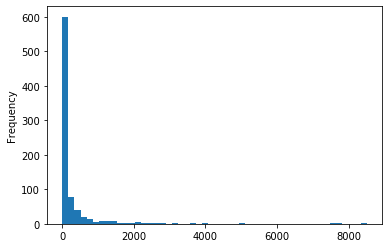

In [34]:
df_num['distance'].plot.hist(bins = 50);

## Distribution

Diamonds data set:

price: $326 $18,823

carat: 0.2–5.01

cut: Fair, Good, Very Good, Premium, Ideal

color: from J (worst) to D (best)

clarity: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: z / mean(x, y) = 2 * z / (x + y) (43–79)

table: width of top of diamond relative to widest point (43–95)

In [35]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
df.shape

(53940, 10)

In [37]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


**convert object into ordinal categorical variable:**

In [39]:
from pandas.api.types import CategoricalDtype 

In [40]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.color = df.color.astype(CategoricalDtype(ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [41]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [42]:
print(df.cut.head(1))

print(df.color.head(1))

print(df.clarity.head(1))

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]
0    E
Name: color, dtype: category
Categories (7, object): [D < E < F < G < H < I < J]
0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < IF < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2]


**fix ordinal sorting:**

In [43]:
cut_cat = ['Fair','Good','Very Good','Premium','Ideal']

In [44]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_cat ,ordered = True))

In [45]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

### Distribution Visualization Using Barplot

**barplot - is used to visualiza categorical variables**

Text(0.5, 1.0, 'Barplot for cut')

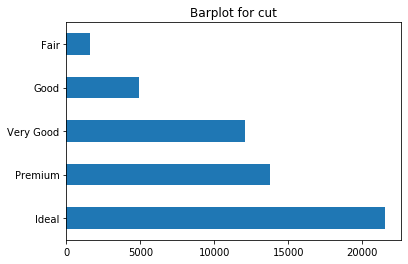

In [46]:
df['cut'].value_counts().plot.barh().set_title('Barplot for cut')

**if we add ";" at the end; Text will be disappeared**

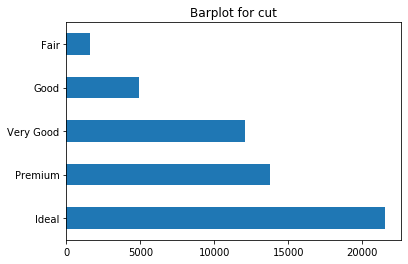

In [47]:
df['cut'].value_counts().plot.barh().set_title('Barplot for cut');

**check the impact of this variable in the dataset:**

In [48]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


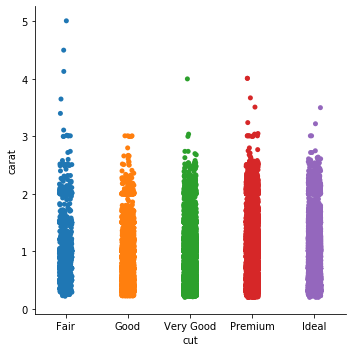

In [49]:
sns.catplot(x='cut', y='carat', data=df);

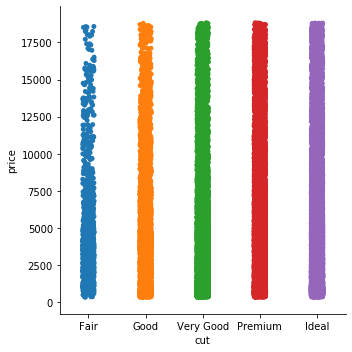

In [50]:
sns.catplot(x='cut', y='price', data=df);

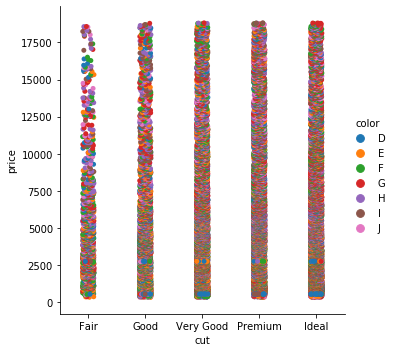

In [51]:
sns.catplot(x='cut', y='price', hue='color', data=df);

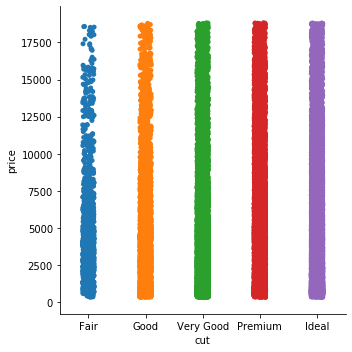

In [52]:
sns.catplot(x='cut', y='price', data=df);

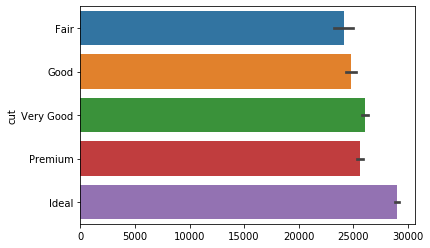

In [53]:
sns.barplot(x = df.cut.index, y = 'cut' , data = df);

In [54]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**use config to enhance visual quality:**

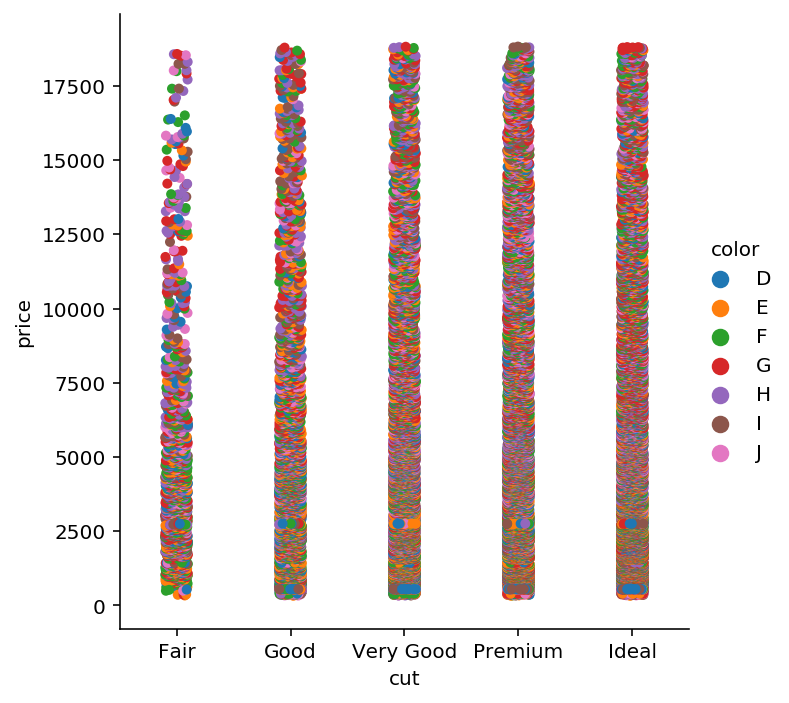

In [55]:
%config InlineBackend.figure_format = 'retina'
sns.catplot(x = 'cut', y = 'price', hue = "color", data = df);

### Distribution Visualization Using Histogram and Density Plot

**histogram and density plot is used to visualize continuous variables**

In [56]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**pandas histogram:**

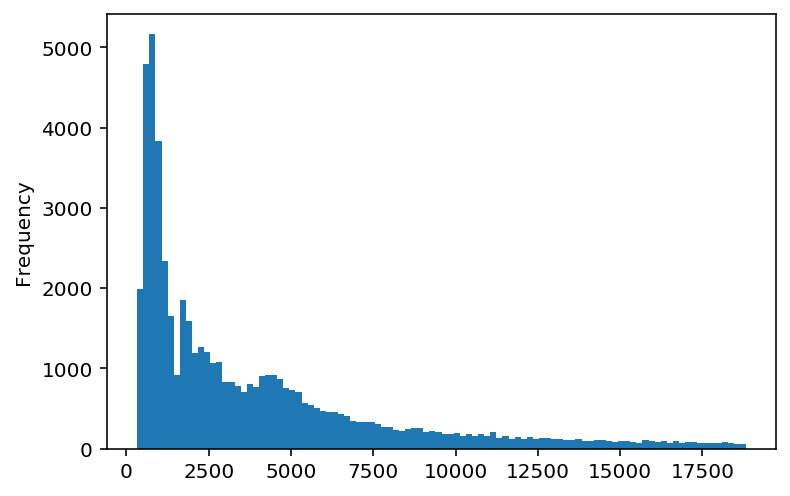

In [57]:
(df['price']
.plot
.hist(bins=100));

**seaborn histogram:**

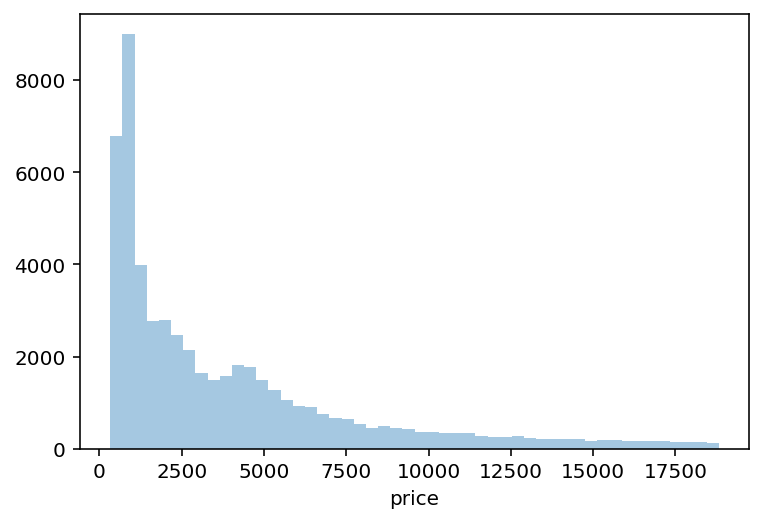

In [58]:
sns.distplot(df.price, kde = False);

**density with histogram:**

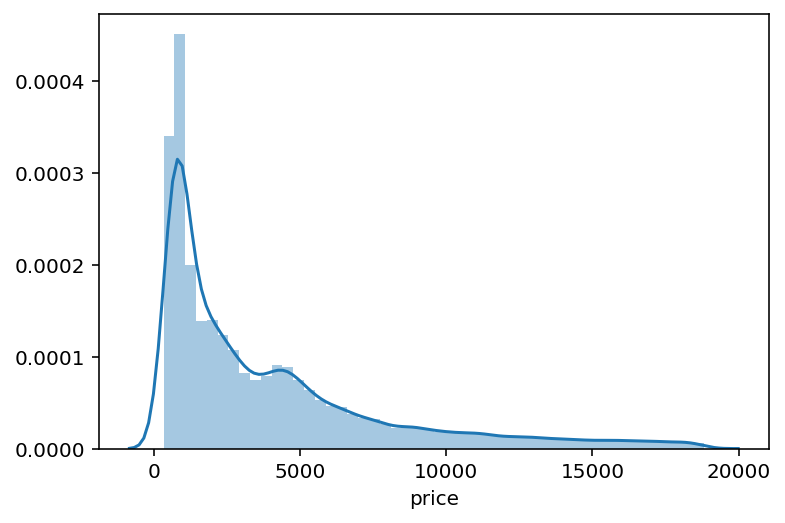

In [59]:
sns.distplot(df.price);

**only density:**

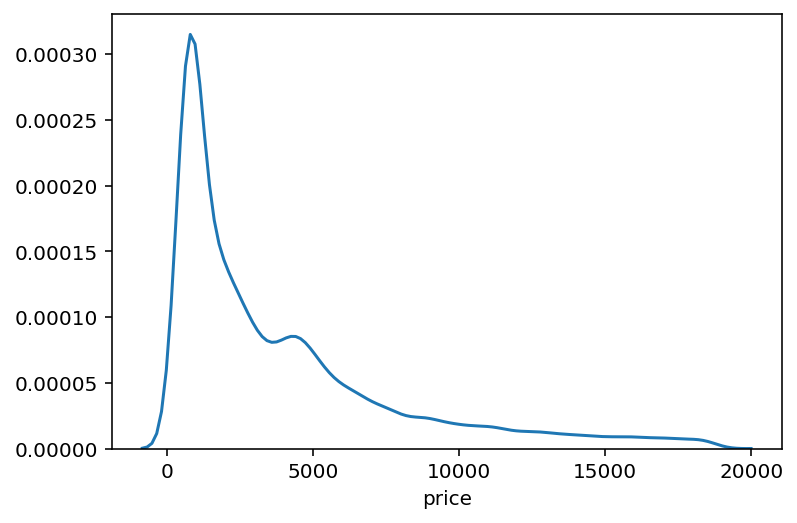

In [60]:
sns.distplot(df.price, hist = False);

**fill under density:**

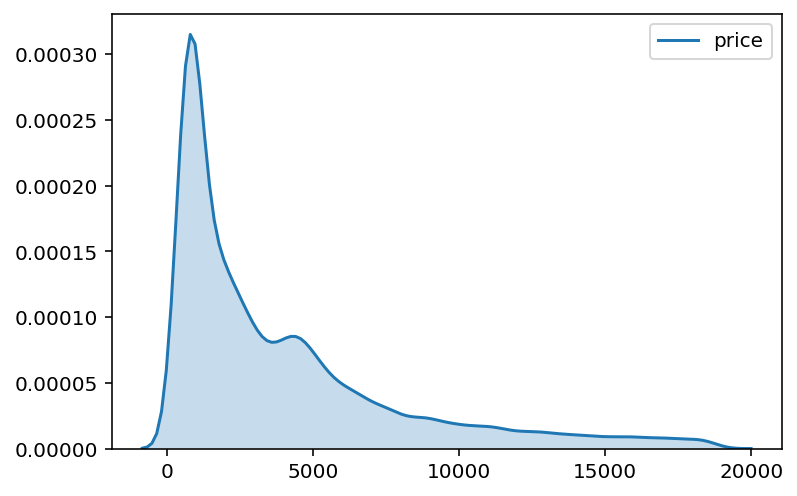

In [61]:
sns.kdeplot(df.price, shade = True);

**to understand the data correctly, make crossing:**

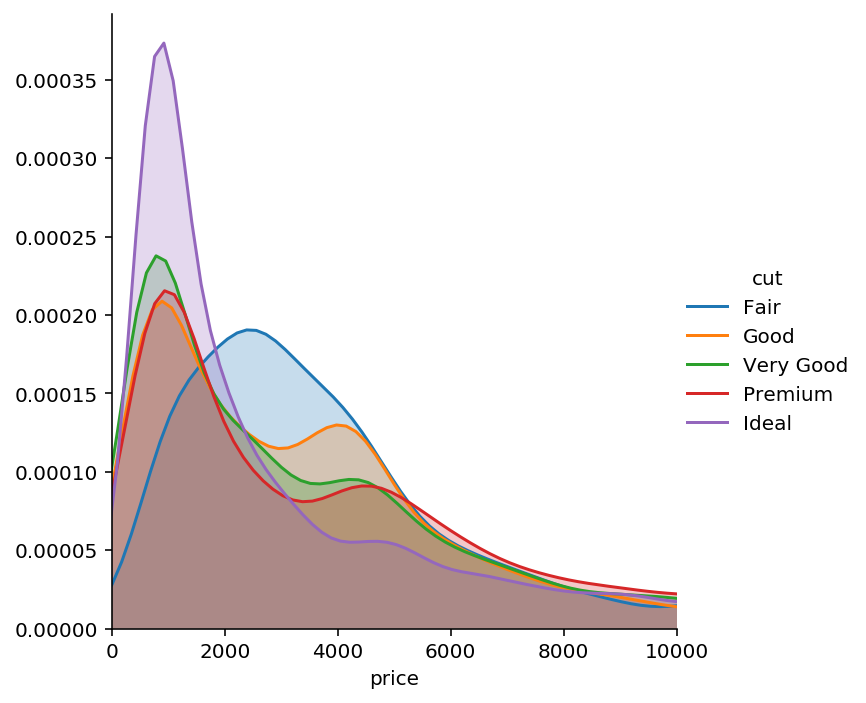

In [62]:
(sns
    .FacetGrid(df,
             hue = 'cut',
             height = 5,
             xlim = (0,10000))
    .map(sns.kdeplot, 'price', shade = True)
    .add_legend()
    );

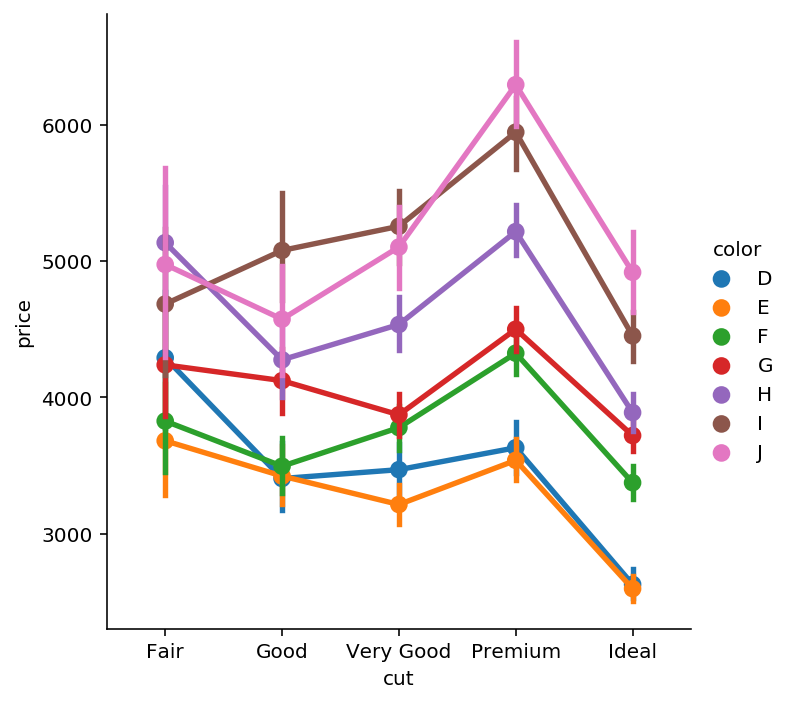

In [63]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point', data = df);

Color and cut have distinctive features. Rods in the intersections give standard deviation. Std dev is bigger for J than E.

### Distribution Visualization Using Boxplot

**boxplot is used for continuous variable. it can be used to outlies detection, dataset distribution observation.**

**tips dataset:**

total_bill: prize of food + tip + tax

tip: tip given

sex: gender of the person paying the bill (0=male, 1=female)

smoker: is there any smoker in the group? (0=No, 1=Yes)

day: 3=Thur, 4=Fri, 5=Sat, 6=Sun

time: 0=Day, 1=Night

size: size of the group

In [64]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
df.shape

(244, 7)

In [66]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


**visualiza the continuous variables:**

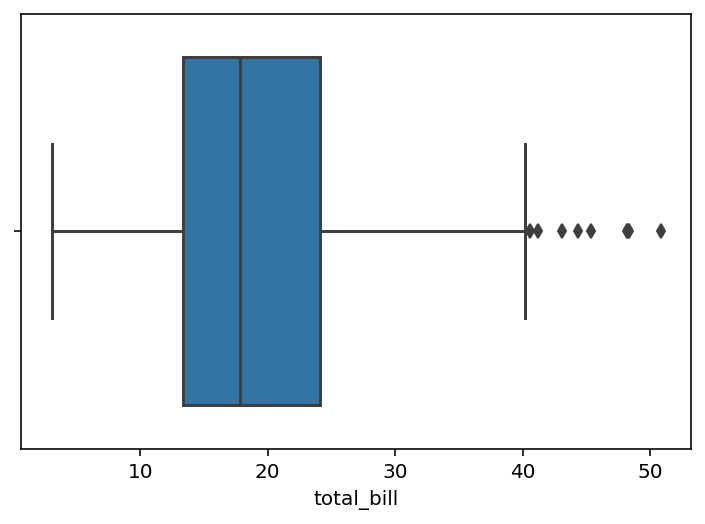

In [68]:
sns.boxplot(x = df['total_bill']);

**change axis:**

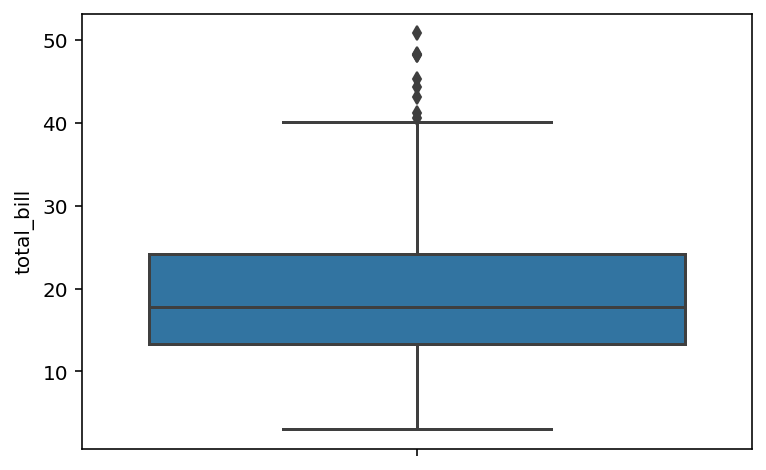

In [69]:
sns.boxplot(x = df['total_bill'], orient='v');

boxplot gives different percentages on the plot.  
max value is about 50  
the horizontal line in the middle is median - 50%  
Between horizontal lines represent 25%  
Points above the upper limit (40) are outliers

**which day they earn most?**

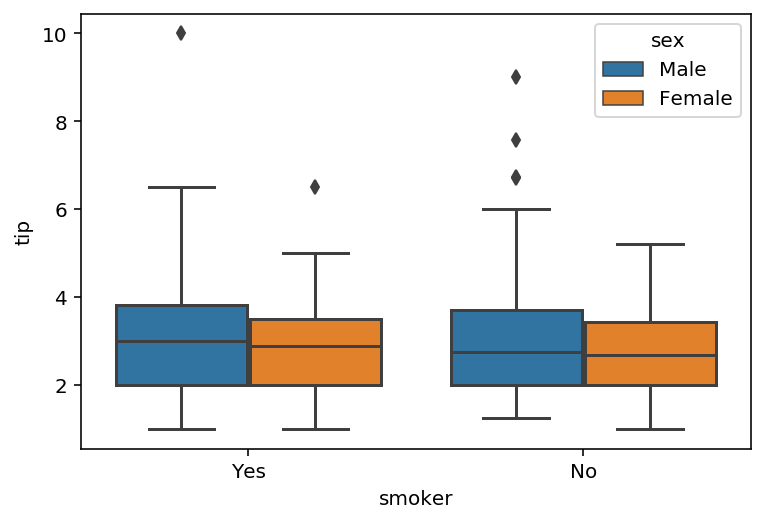

In [70]:
sns.boxplot(x = 'smoker', y= 'tip', hue = 'sex', data = df);


**is there any relation between group size and the bill?

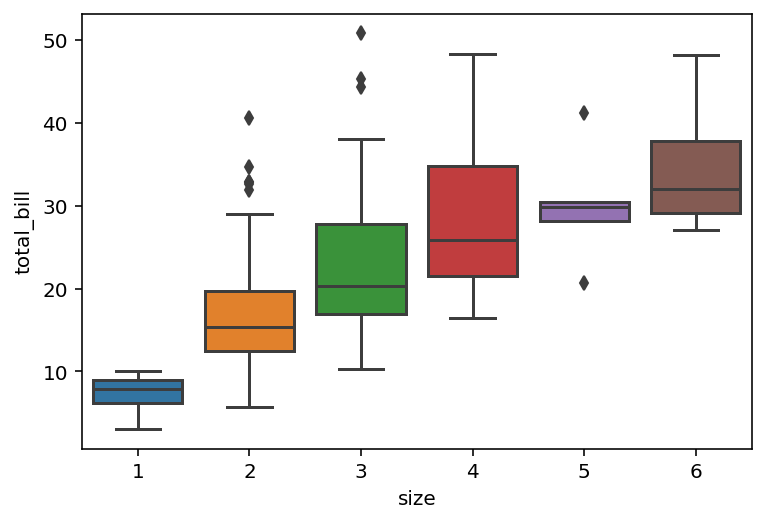

In [71]:
sns.boxplot(x = 'size', y= 'total_bill', data = df);


**meal time vs bill:**

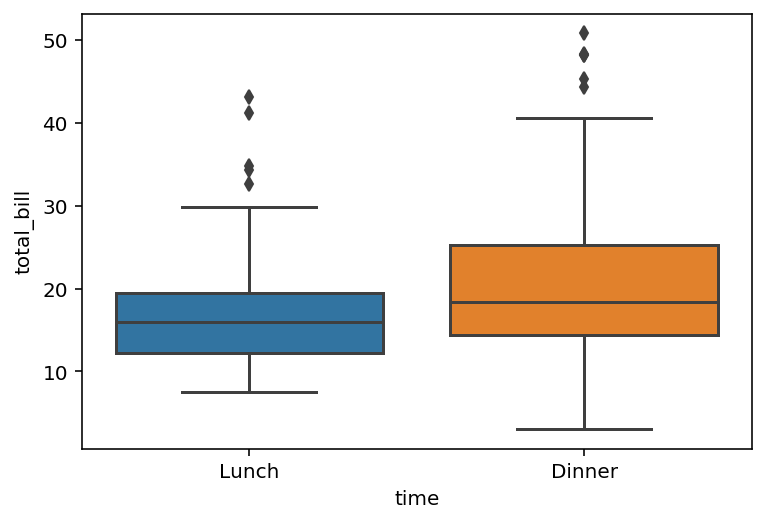

In [72]:
sns.boxplot(x = 'time', y= 'total_bill', data = df);


**is there any relation between smokers and bills?**

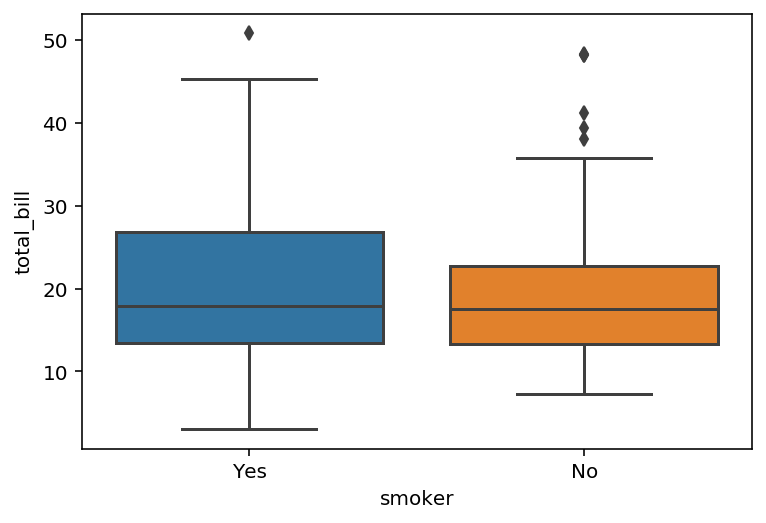

In [73]:
sns.boxplot(x = 'smoker', y= 'total_bill', data = df);


**total bill according to sex and day:**

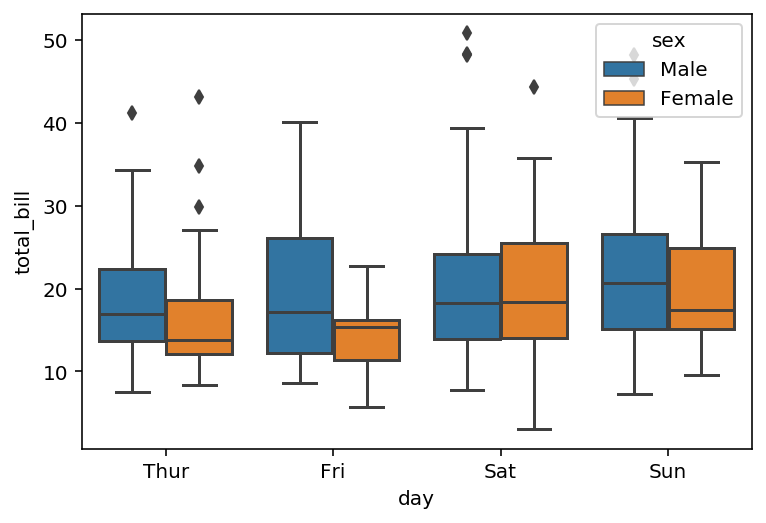

In [74]:
sns.boxplot(x = 'day', y= 'total_bill', hue = 'sex', data = df);


### Distribution Visualization Using Violin

**violin is used to visualize continuous variables**

In [75]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


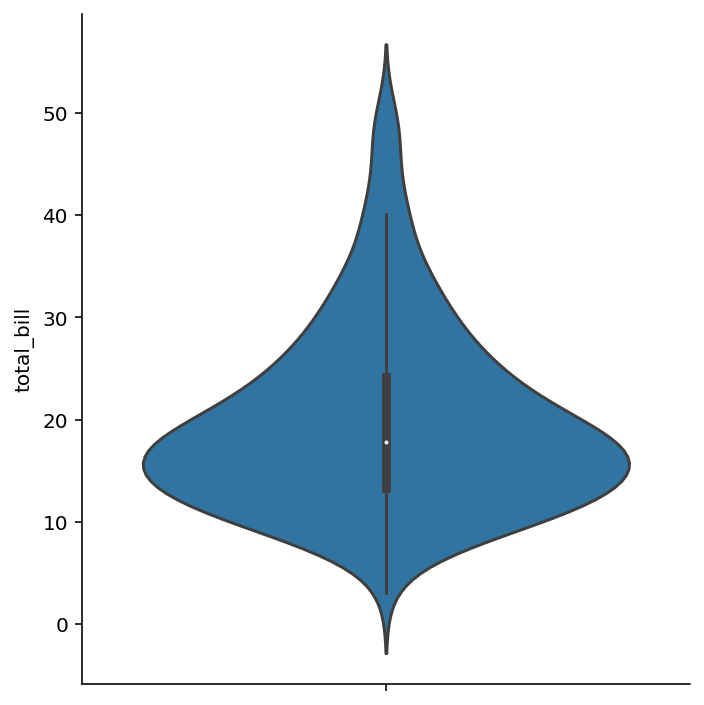

In [76]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

**distribution accorting to days:**

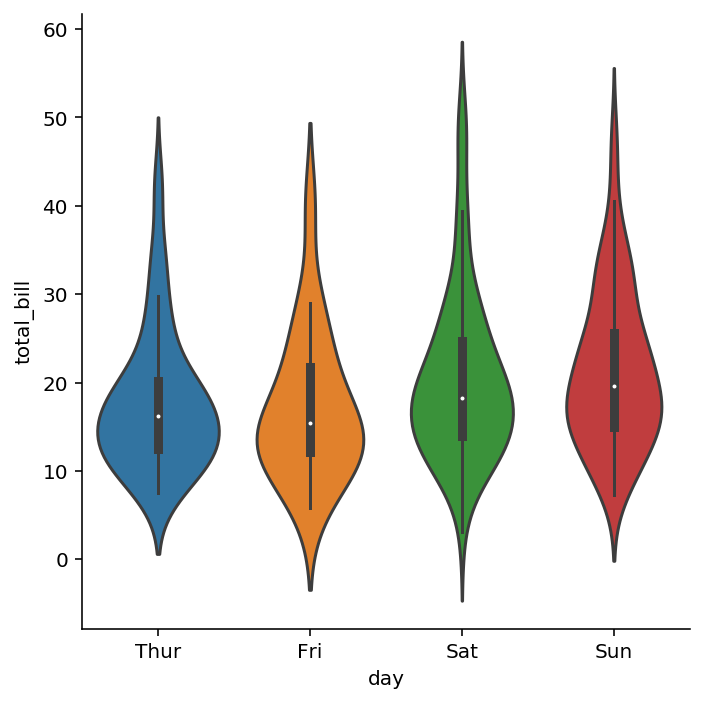

In [77]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', data = df);

**add sex variable:**

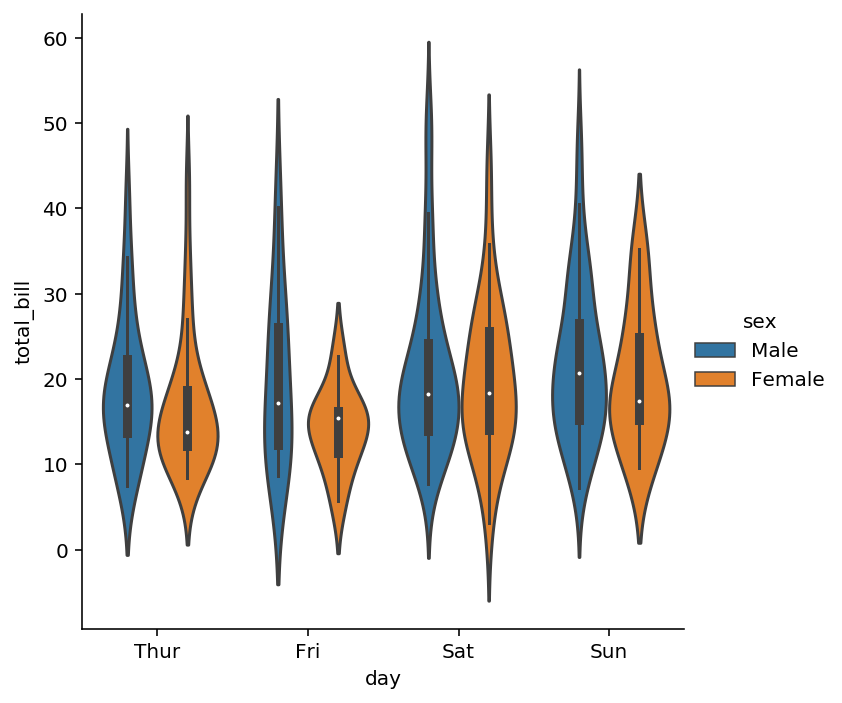

In [78]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', hue = 'sex', data = df);

**creating histogram using facetgrid:**

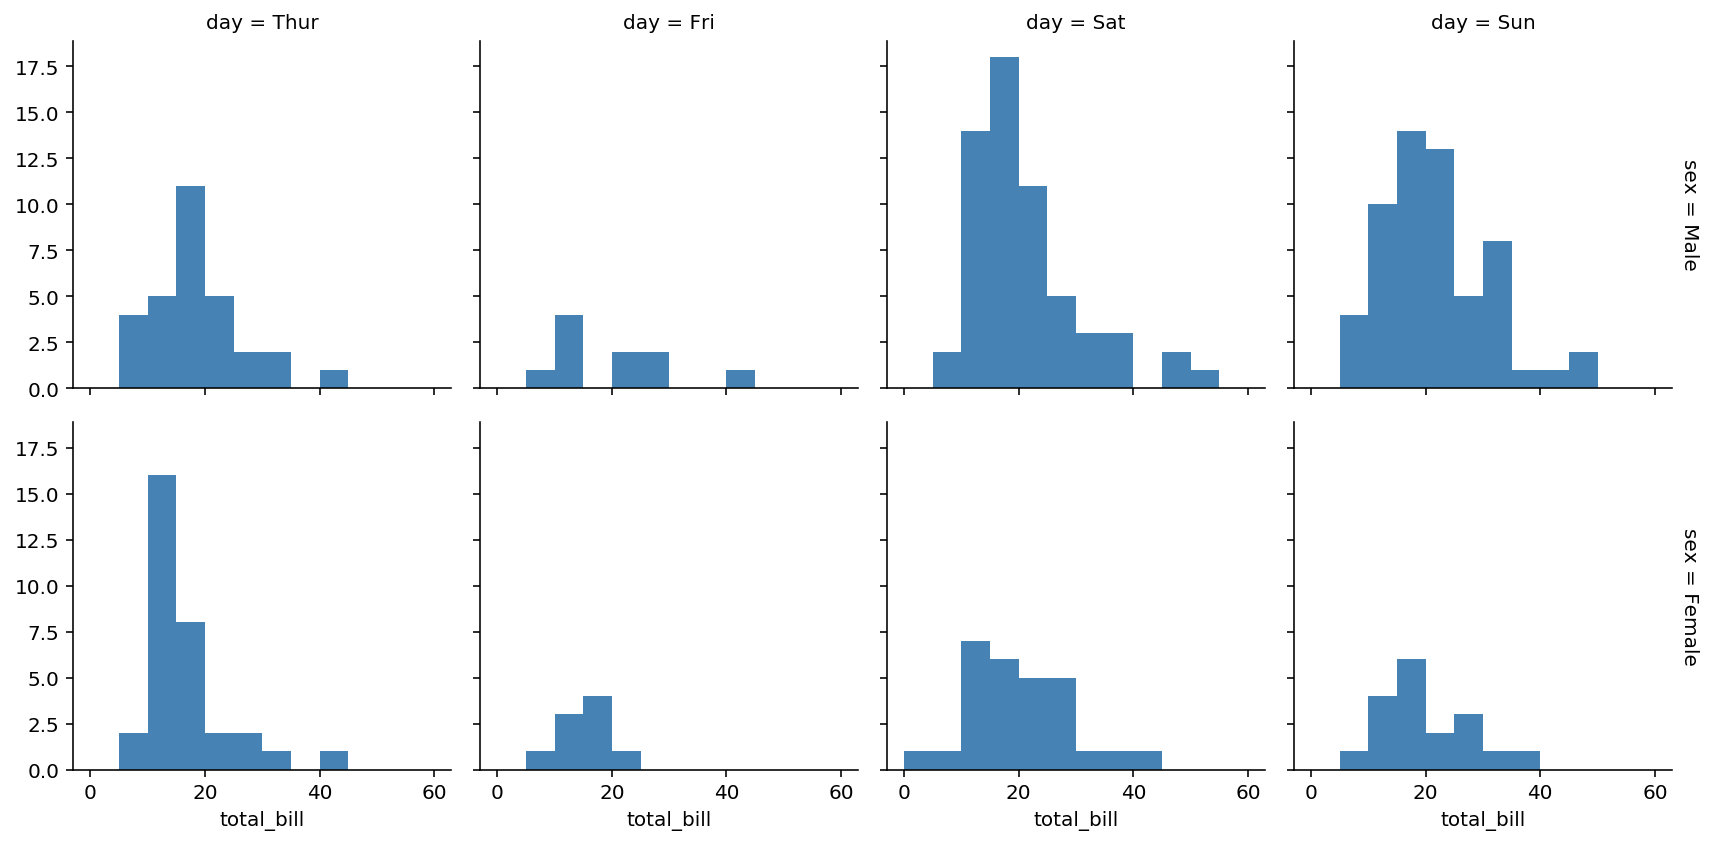

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, row = "sex", col = "day", margin_titles = True) 

bins = np.linspace(0, 60, 13) #ranges

g.map(plt.hist, "total_bill", color="steelblue", bins=bins);


## Correlation

**correlation** - a statistical concept which indicates relations of variables to each other

We can use different methods for correlation visualization

### Simple Scatterplot

In [80]:
import seaborn as sns; 
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**species** - dependent variable  
others - independent variables

**creating a scatterplot matrix using pairplot:**

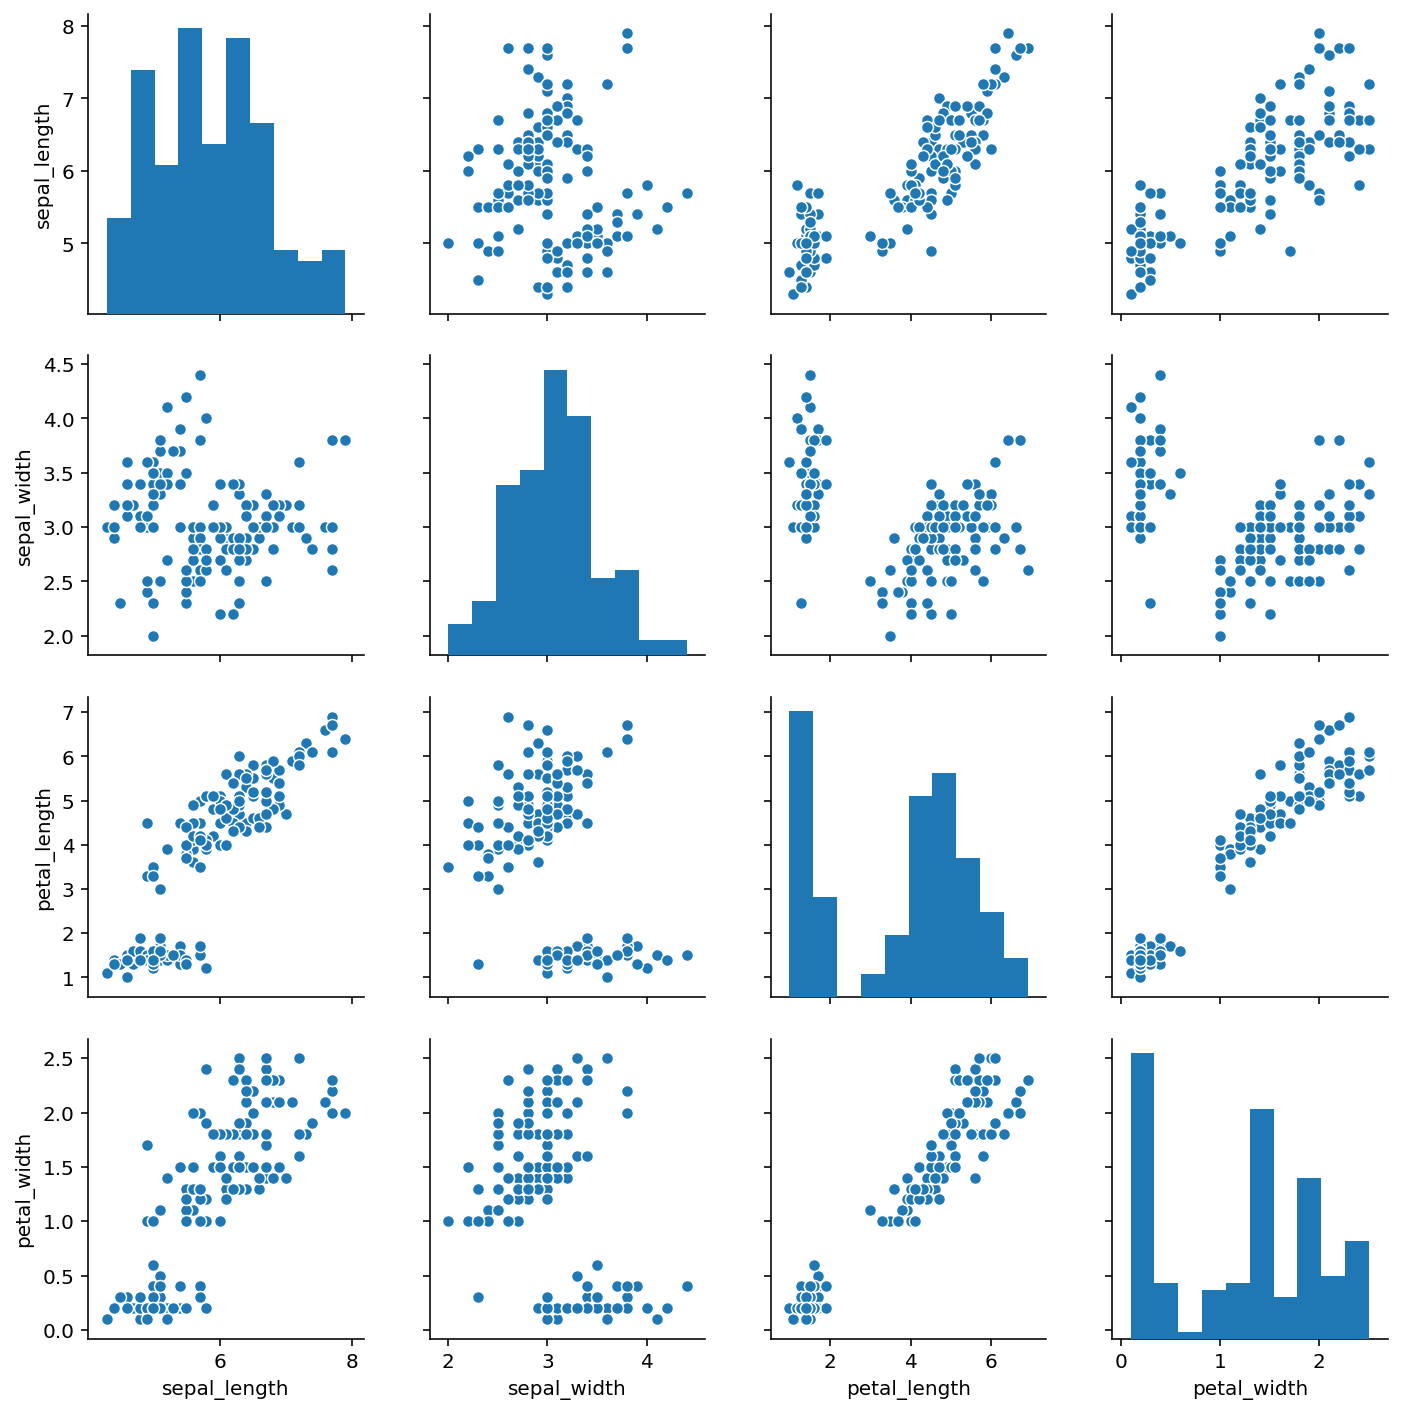

In [81]:
sns.pairplot(df);

**add species as a categorical variable:**

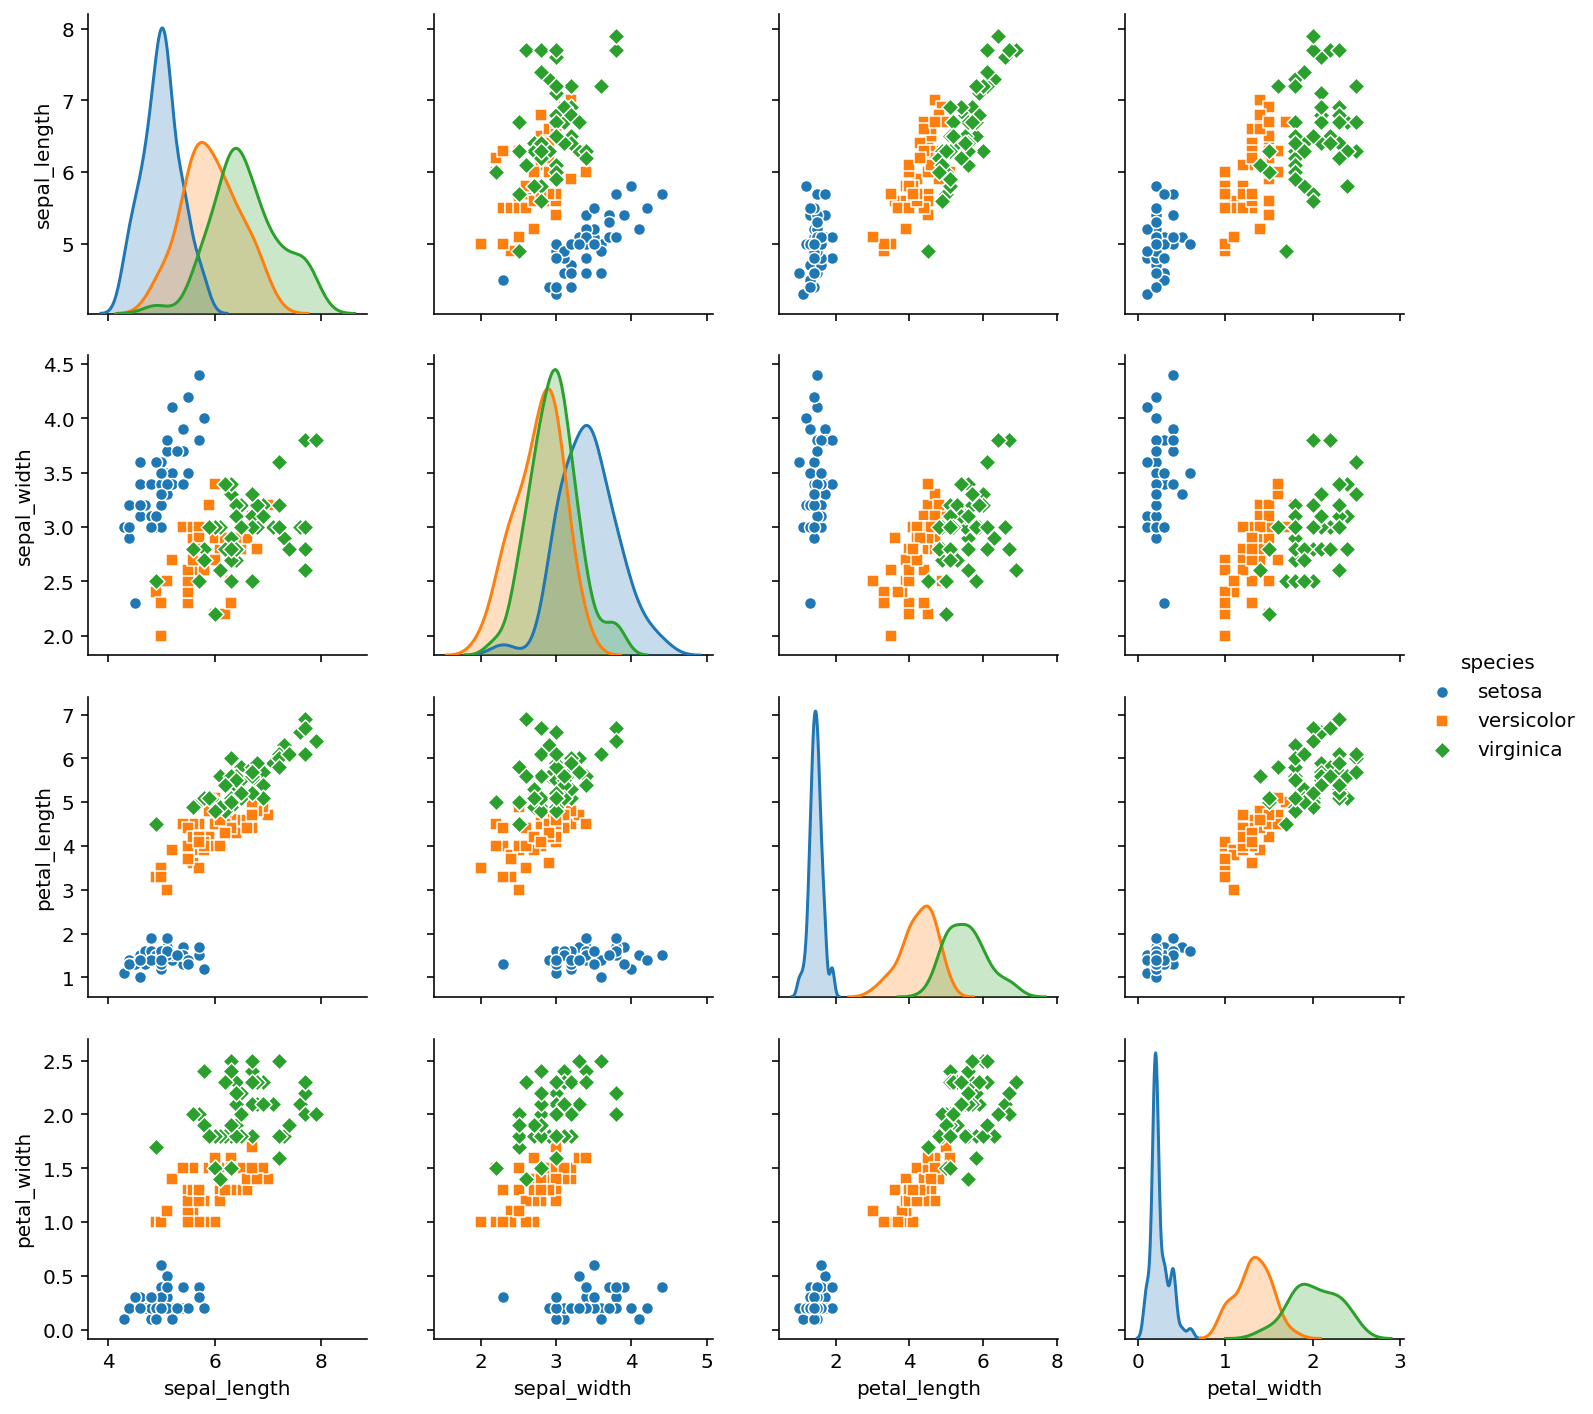

In [82]:
sns.pairplot(df, hue = "species", markers = ['o','s','D']);

**subset of this visual:**

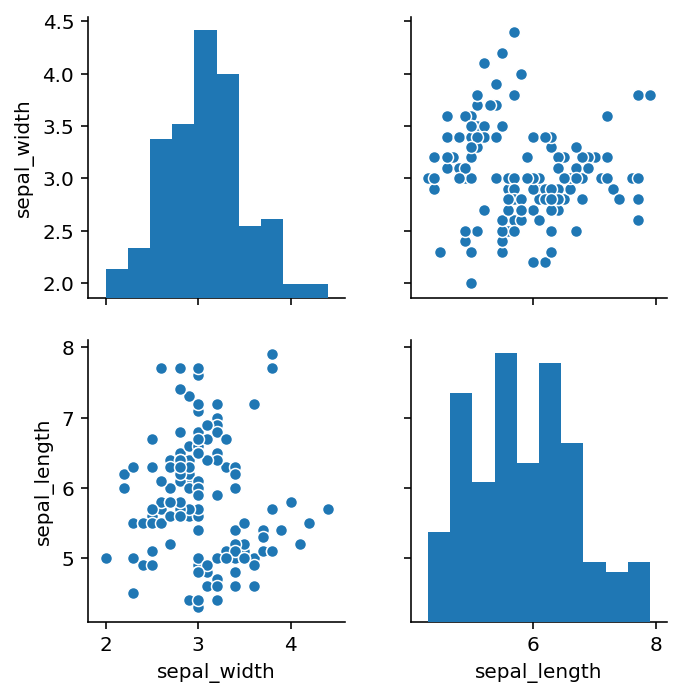

In [83]:
sns.pairplot(df, vars = ['sepal_width','sepal_length']);

**in order to understand correlation, add regression line:**

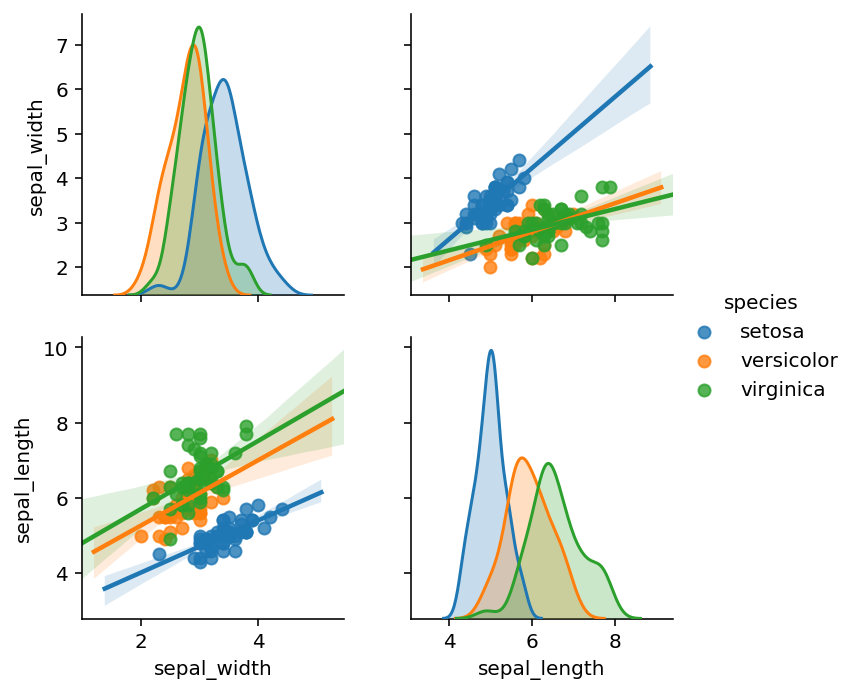

In [84]:
sns.pairplot(df, vars = ['sepal_width','sepal_length'], hue = "species", kind = "reg");

**dependent density graph and scatter plot matrix:**

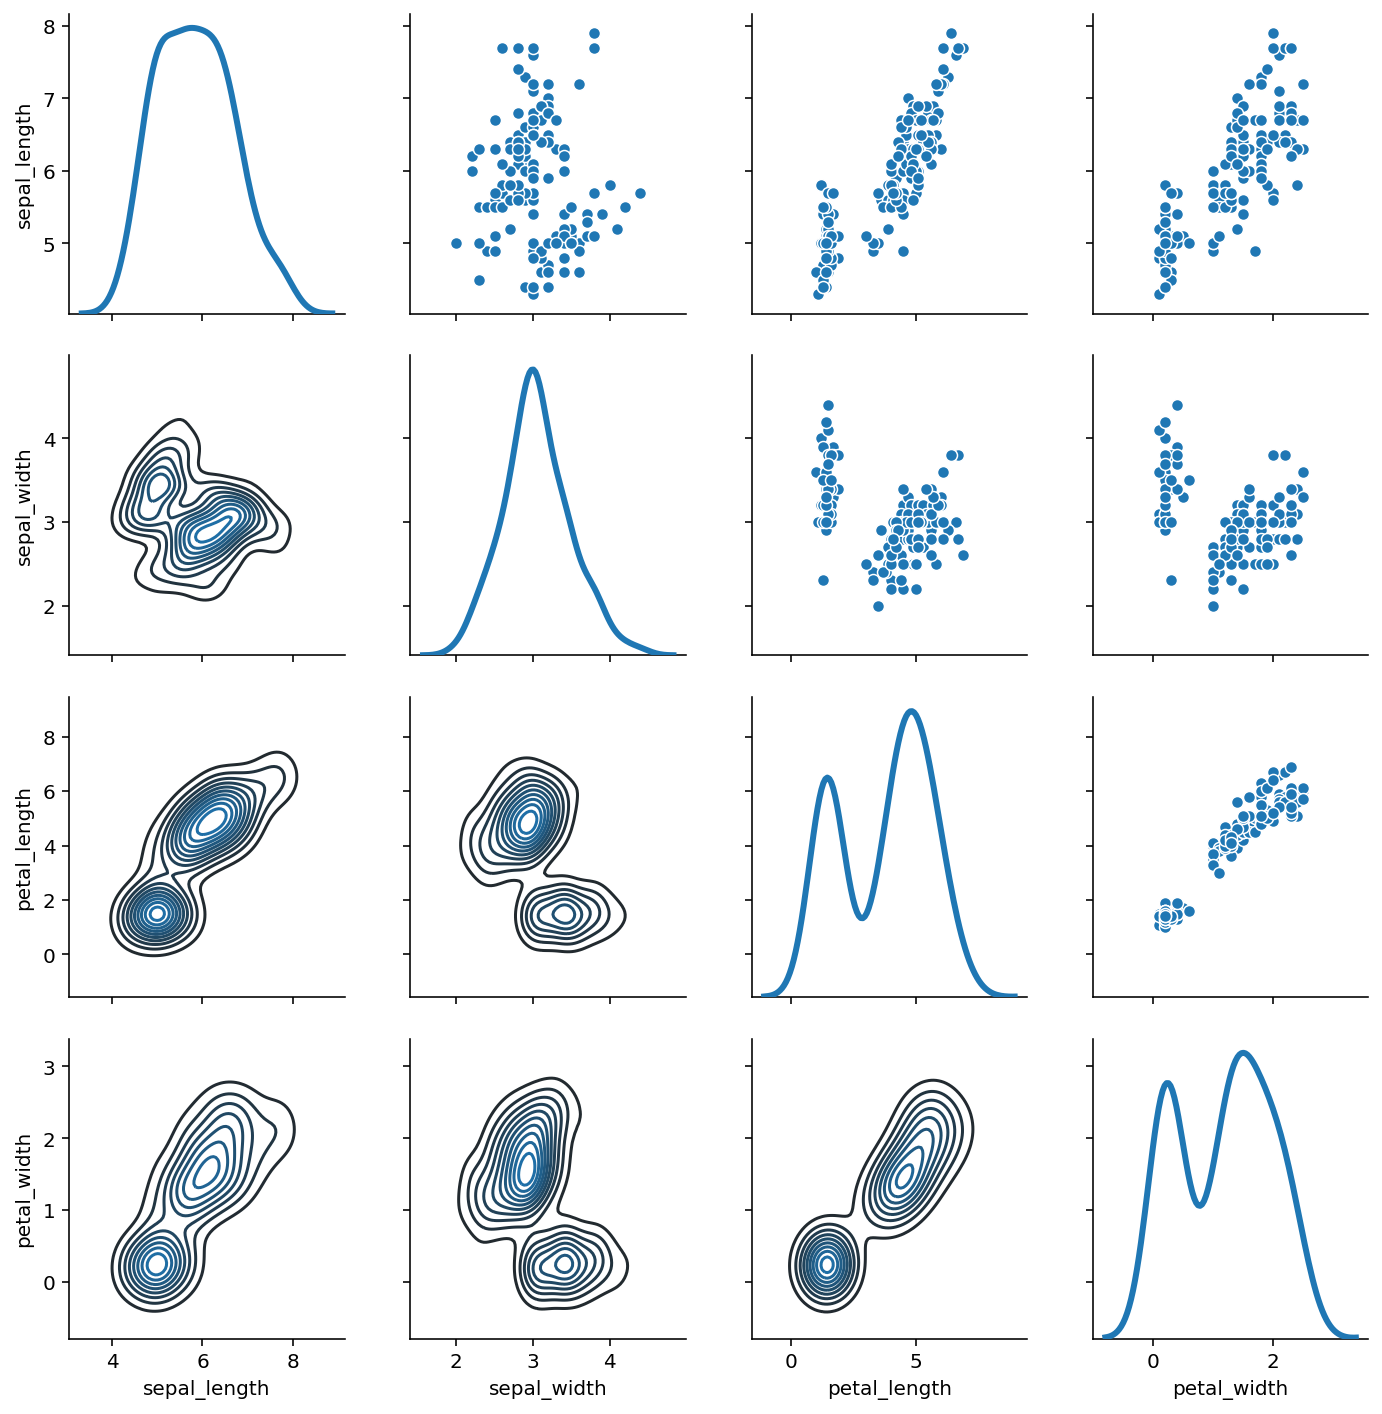

In [85]:
g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw = 3);

### Heatmap

In [86]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [87]:
df.shape

(144, 3)

In [88]:
df = df.pivot("month","year","passengers")
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


**heatmap** - useful for pattern detection studies. light colors represent higher values.

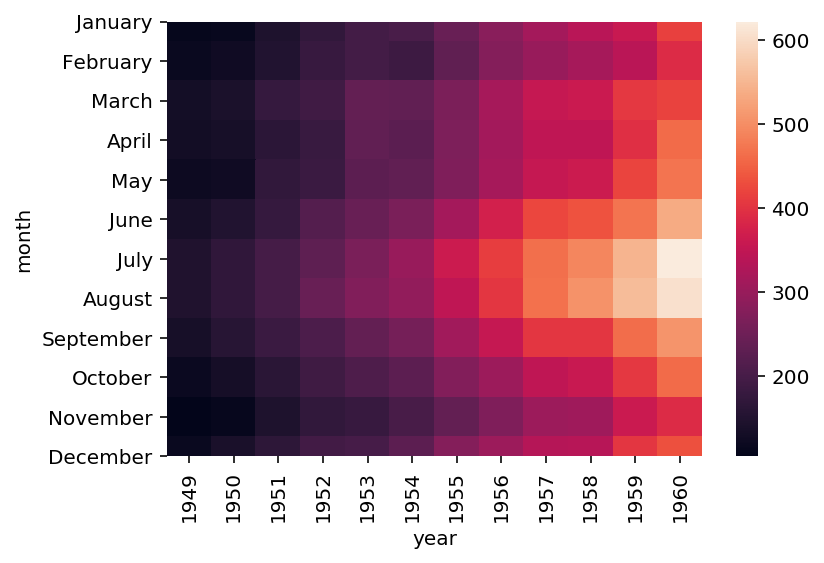

In [89]:
sns.heatmap(df);

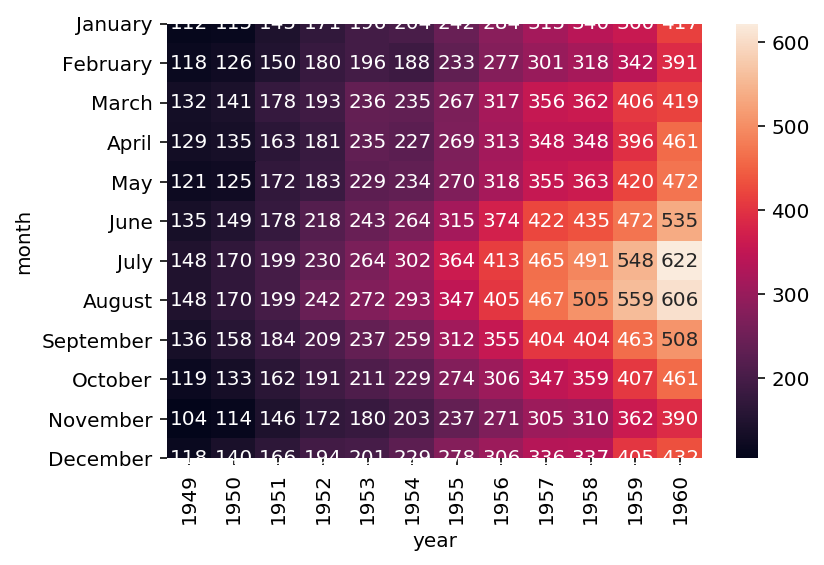

In [90]:
sns.heatmap(df, annot = True, fmt = 'd');

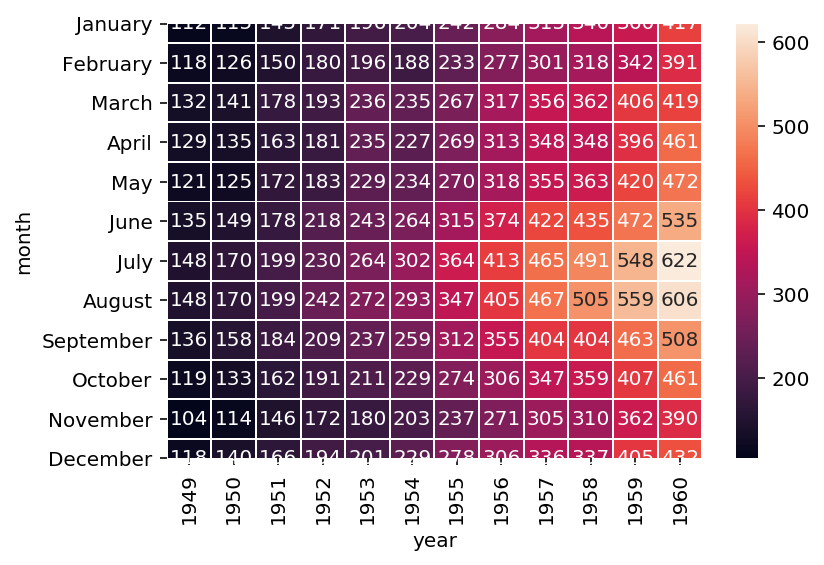

In [91]:
sns.heatmap(df, annot = True, fmt = 'd', linewidths = .5);

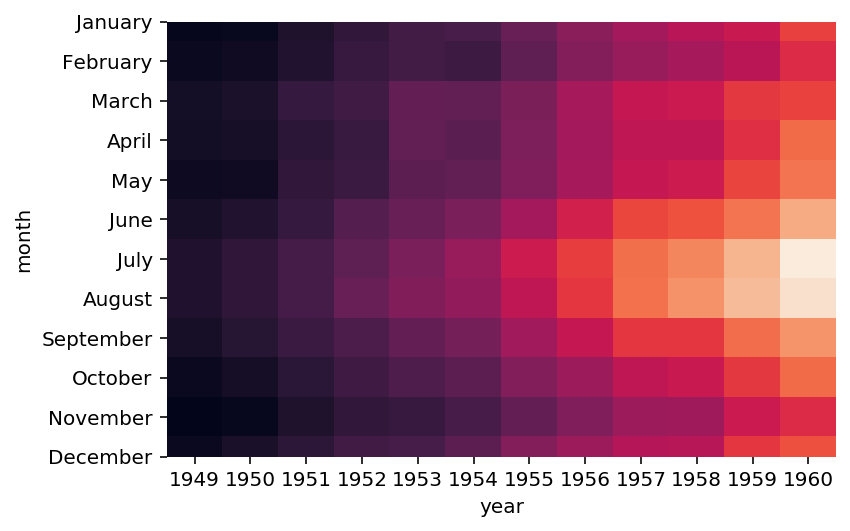

In [92]:
sns.heatmap(df, cbar = False);

In [93]:
# settings about output size:

import seaborn as sns

sns.set_context("poster")
sns.set(rc={'figure.figsize': (5, 5)})
sns.set_style("whitegrid")

## Line Chart

In [94]:
import seaborn as sns

fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [95]:
df.shape

(1064, 5)

In [96]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [97]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

**scatter plot:**

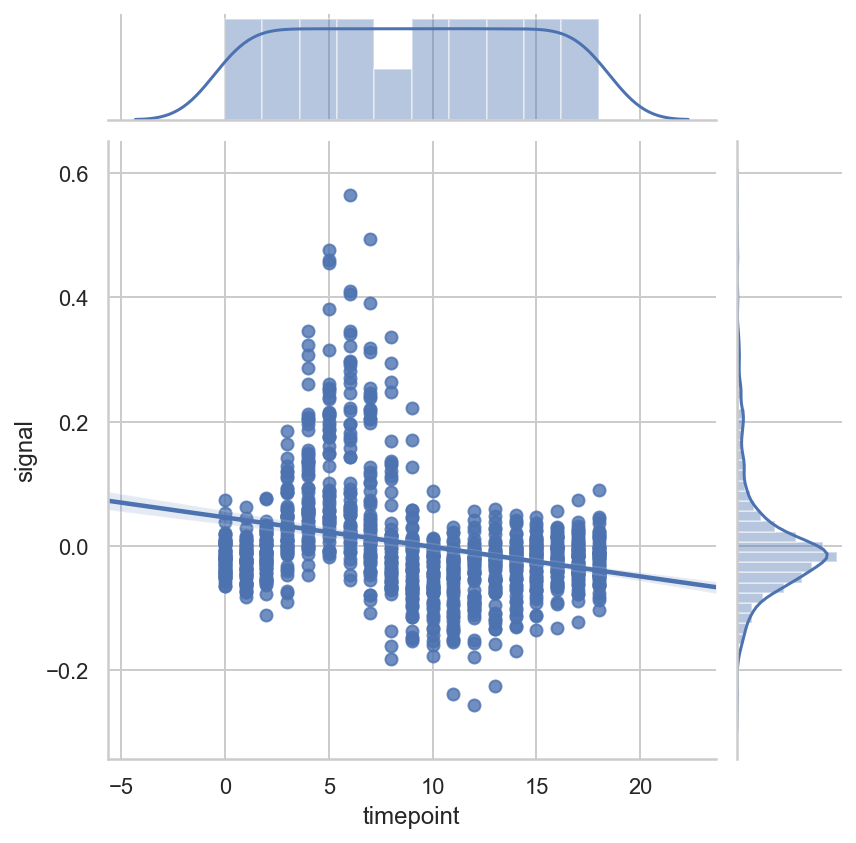

In [98]:
sns.jointplot(x = 'timepoint', y = 'signal', data = df, kind = "reg");

**is signal count same for each time point?**

In [99]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

**yes! then, we expect each signal is unique. verify reversely:**

In [100]:
df.groupby("signal")["timepoint"].count()

signal
-0.255486    1
-0.238474    1
-0.224351    1
-0.181241    1
-0.178510    1
            ..
 0.455575    1
 0.460896    1
 0.476055    1
 0.494787    1
 0.564985    1
Name: timepoint, Length: 1064, dtype: int64

**general info with line chart:**

In [101]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


**create the graph:**

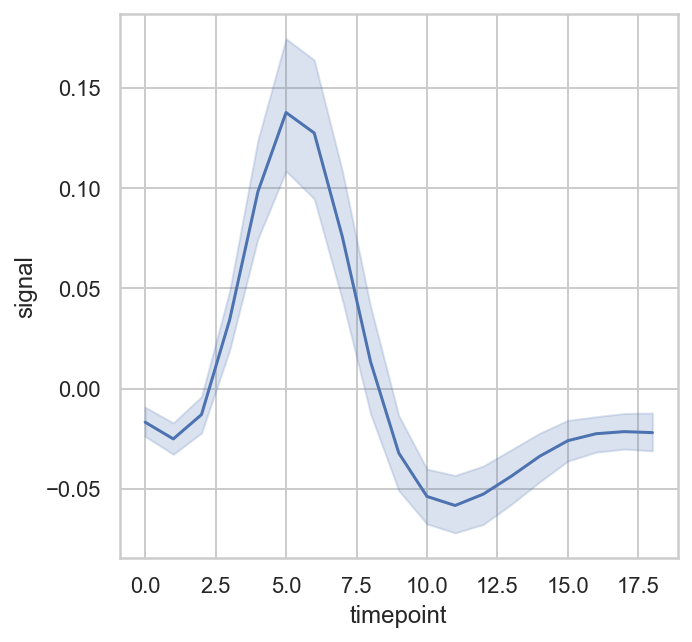

In [102]:
sns.lineplot(x = "timepoint",  y = "signal", data = df);

**line** - signals  
**light blue** - standard deviation

**add categorical variable:**

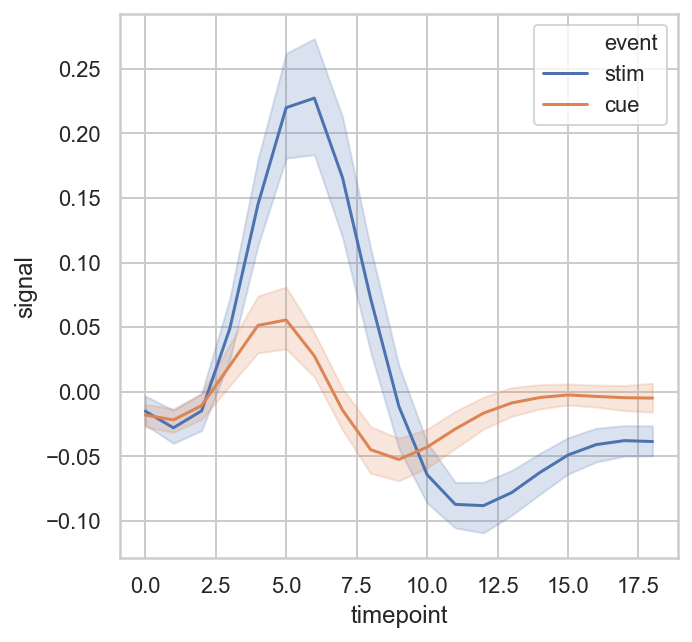

In [103]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

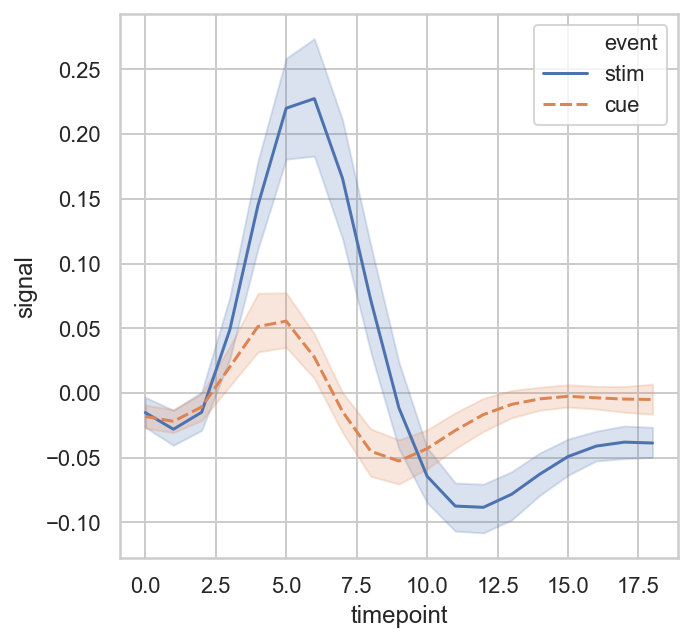

In [104]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

**make mean values explicit:**

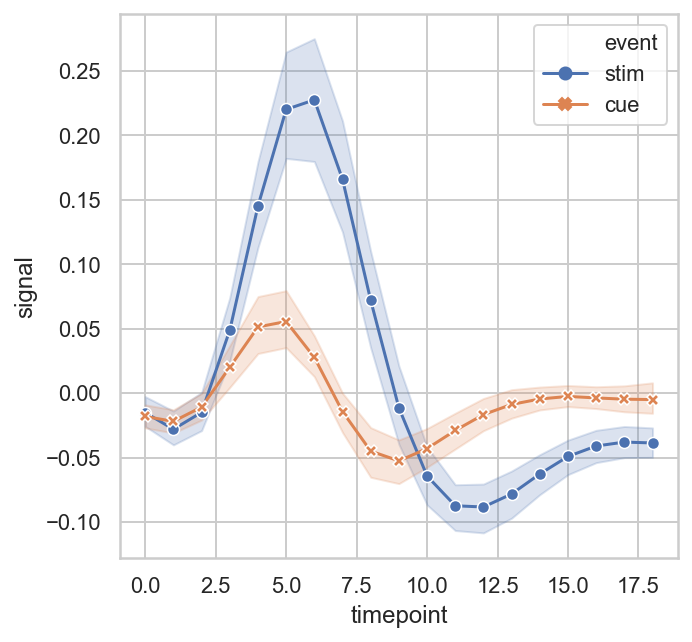

In [105]:
sns.lineplot(x = "timepoint", y = "signal", 
             hue = "event", style = "event",
             markers = True, dashes = False, data = df);

**adding second categorical variable:**

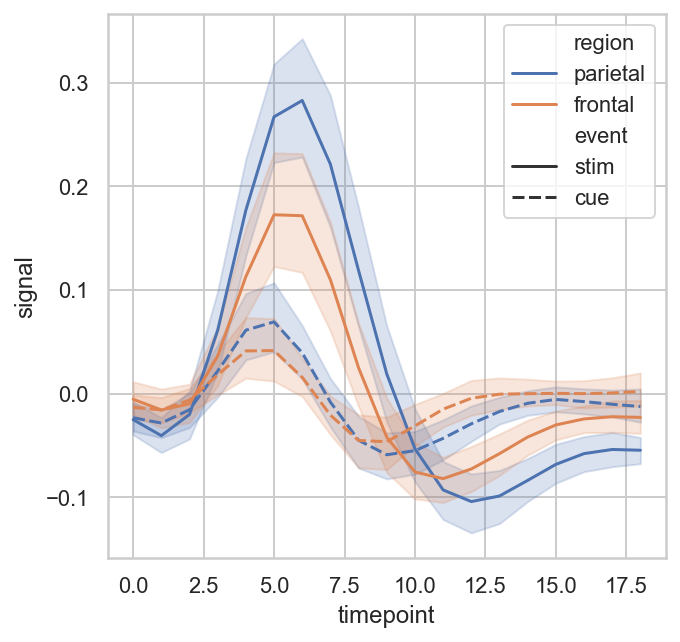

In [106]:
sns.lineplot(x = "timepoint", y = "signal", hue = "region", 
             style = "event", data = df);

## References

https://matplotlib.org

https://pandas.pydata.org/

http://seaborn.pydata.org/

https://ggplot2.tidyverse.org/

https://docs.bokeh.org/en/latest/

https://plot.ly/python/

udemy.com - Veri Bilimi ve Machine Learning